# Visualização de Dados

In [10]:
import platform
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from IPython.display import HTML


# large = 22; med = 14; small = 12
# params = {'axes.titlesize': large,
#           'legend.fontsize': med,
#           'figure.figsize': (16, 10),
#           'axes.labelsize': med,
#           'axes.titlesize': med,
#           'xtick.labelsize': med,
#           'ytick.labelsize': med,
#           'figure.titlesize': large}

#plt.rcParams.update(params)
#plt.style.use('seaborn-whitegrid')
#sns.set(style="whitegrid")

#%matplotlib inline

print('Versões:')
print('OS: {}, {}, {}'.format(platform.system(), platform.release(), platform.version()))
print('Python: {}'.format(platform.python_version()))
print('NumPy: {}'.format(np.__version__))
print('Pandas: {}'.format(pd.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(sns.__version__))

import warnings
warnings.filterwarnings(action='ignore')

###########################
# Dataframes preparados 
###########################
df_tempo = pd.read_csv('dados/clima_brasilia/BrasiliaTRY1962_05.csv', encoding='latin1')
df_temp_media_mes = df_tempo[['Mês','TBS {C}','TBU {C}']].groupby('Mês', as_index=False).mean()

Versões:
OS: Windows, 10, 10.0.16299
Python: 3.7.1
NumPy: 1.15.4
Pandas: 0.23.4
Matplotlib: 3.0.2
Seaborn: 0.9.0


## Line Plot

Referências:

1. https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
2. https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
3. https://seaborn.pydata.org/generated/seaborn.lineplot.html


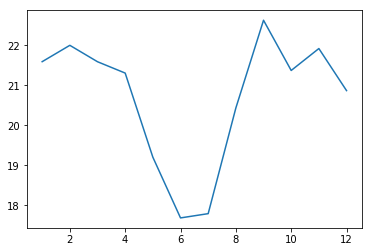

In [11]:
"""
Gráfico de linha simples
"""
plt.plot(df_temp_media_mes['Mês'], df_temp_media_mes['TBS {C}'])

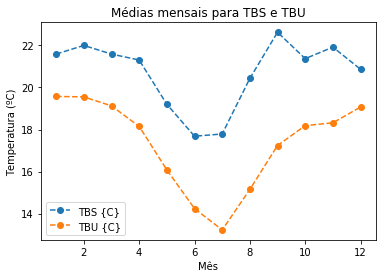

In [12]:
"""
Gráfico de linha com mais de uma série no mesmo gráfico e algumas customizações
"""
plt.plot(df_temp_media_mes['Mês'], 
         df_temp_media_mes['TBS {C}'], linestyle='--', 
         marker='.', markersize=12)
plt.plot(df_temp_media_mes['Mês'], 
         df_temp_media_mes['TBU {C}'], linestyle='--', 
         marker='.', markersize=12)
plt.title('Médias mensais para TBS e TBU')
plt.ylabel('Temperatura (ºC)')
plt.xlabel('Mês')
plt.legend()


Text(0, 0.5, 'Temperatura (ºC)')

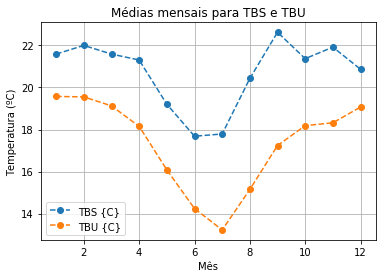

In [4]:
"""
Pandas
"""
df_temp_media_mes.plot('Mês', ['TBS {C}','TBU {C}'], kind='line', grid=True, 
                       title='Médias mensais para TBS e TBU', 
                       linestyle='--', marker='.', markersize=12)
plt.ylabel('Temperatura (ºC)')

## Scatter Plot

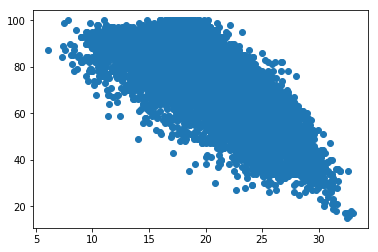

In [13]:
"""
Exemplo simples de scatter plot
"""
plt.scatter(df_tempo['TBS {C}'],df_tempo['U. R. {%}'])

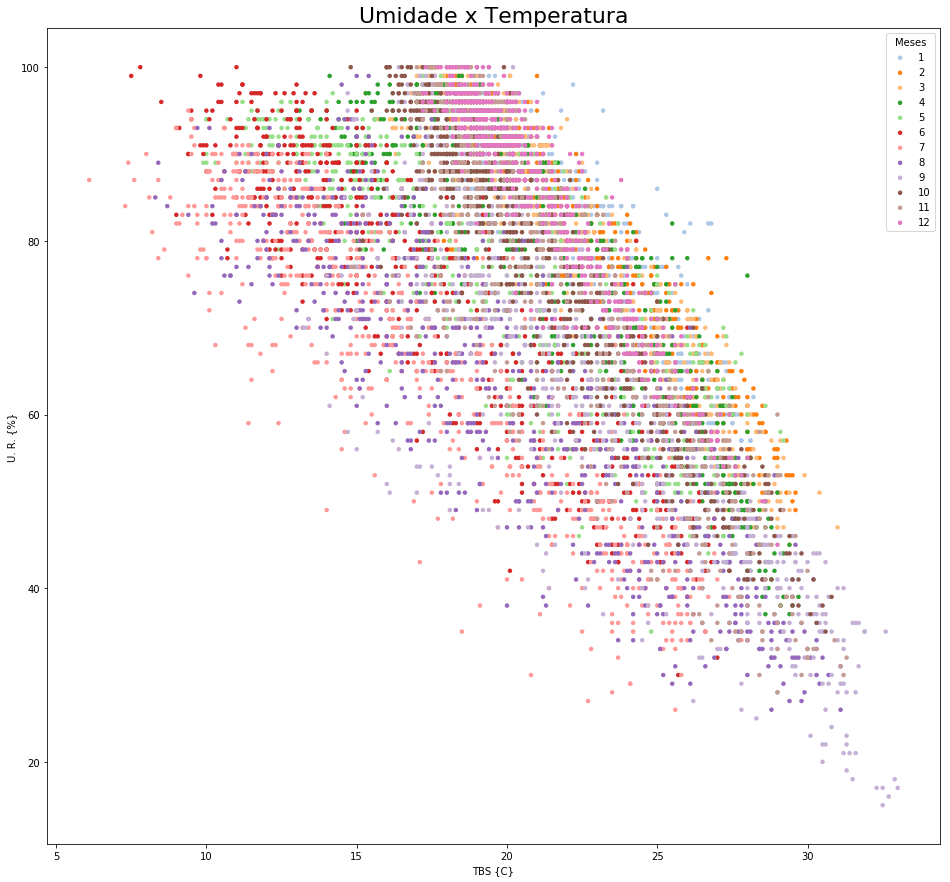

In [6]:
"""
Exemplo de scatter plot onde os pontos são diferenciados por cor de acordo com alguma coluna.
"""
fig = plt.figure(figsize=(16, 15))


colors = plt.get_cmap('tab20')

for mes in df_tempo['Mês'].drop_duplicates().sort_values(): 
    df_mes = df_tempo[df_tempo['Mês'] == mes]
    ax = plt.scatter(
        df_mes['TBS {C}'],df_mes['U. R. {%}'], 
        alpha=1, s=12, label='{}'.format(mes), c=colors(df_mes['Mês'])
    )
    
plt.xlabel('TBS {C}')
plt.ylabel('U. R. {%}')
plt.title('Umidade x Temperatura', fontsize=22)
plt.legend(title='Meses', fontsize=10)
plt.show()

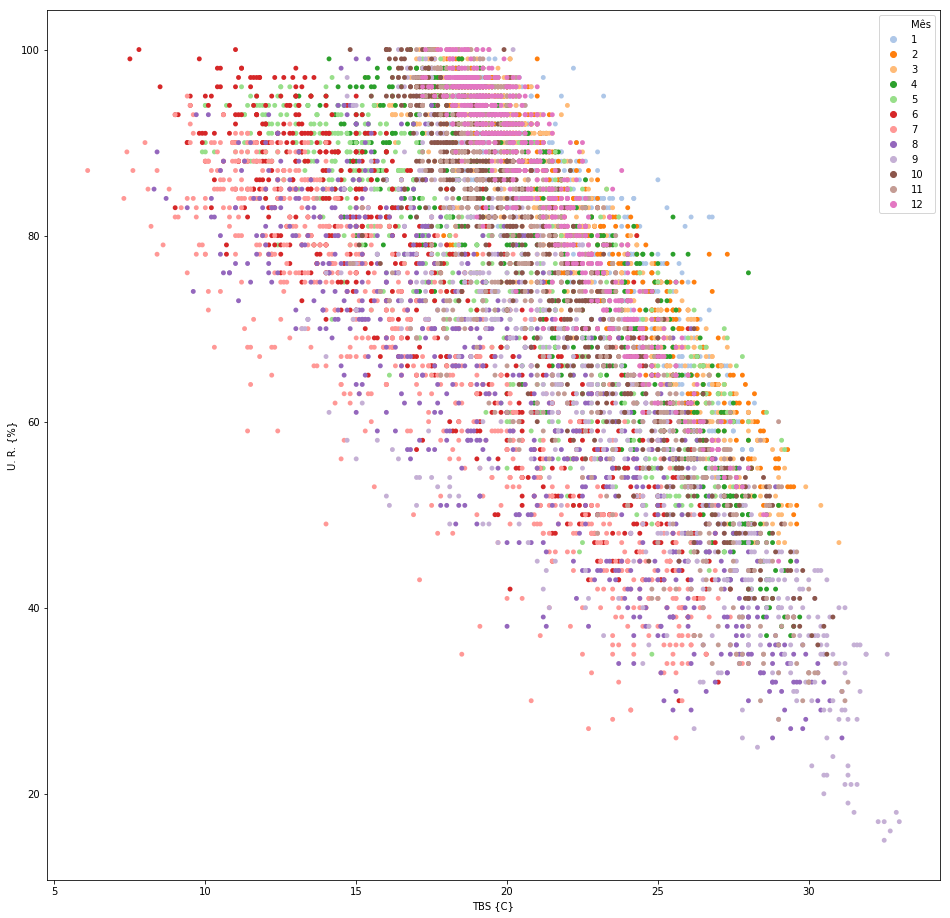

In [7]:
fig = plt.figure(figsize=(16, 16))
colors = plt.get_cmap('tab20')
sns.scatterplot('TBS {C}', 'U. R. {%}', 
                hue='Mês',
                data=df_tempo, 
                palette={c: colors(c) for c in df_tempo['Mês'].drop_duplicates().sort_values()},
                alpha=1, s=24, linewidth=0
               )

<Figure size 1188x504 with 0 Axes>

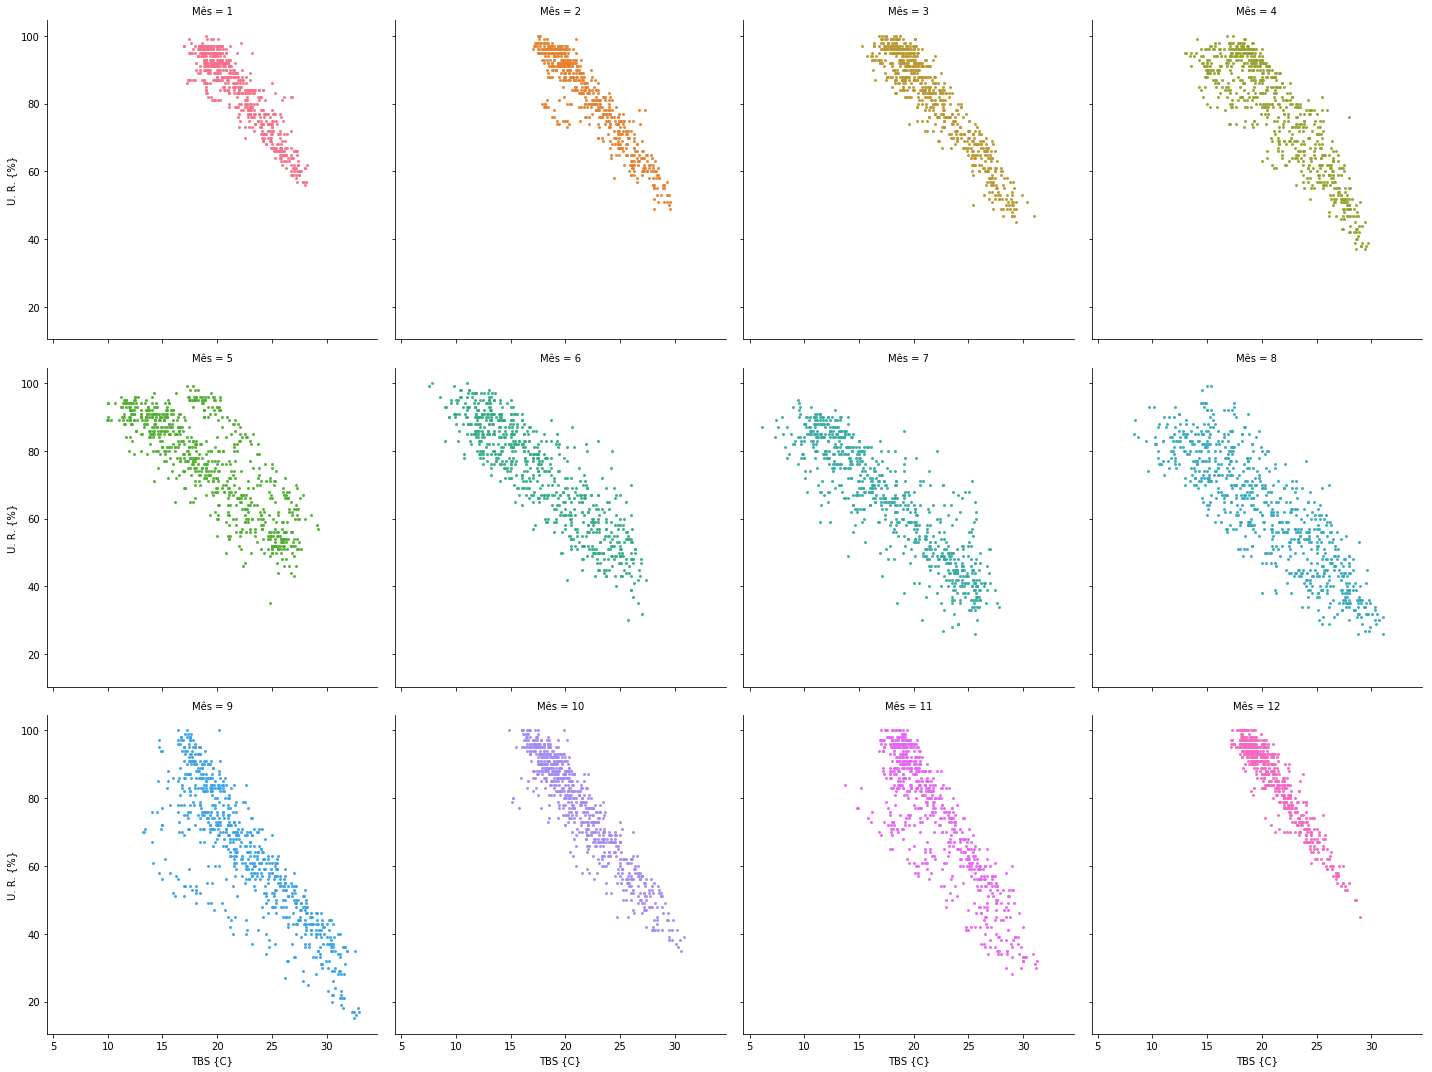

In [8]:
fig = plt.figure(figsize=(16.5, 7))
ax = sns.lmplot(x='TBS {C}', y='U. R. {%}', data=df_tempo, hue='Mês', 
                col='Mês', col_wrap=4, scatter_kws={'alpha':0.9, 's': 4}, 
                fit_reg=False)
plt.show()

# Vamos entender um pouco de matplotlib

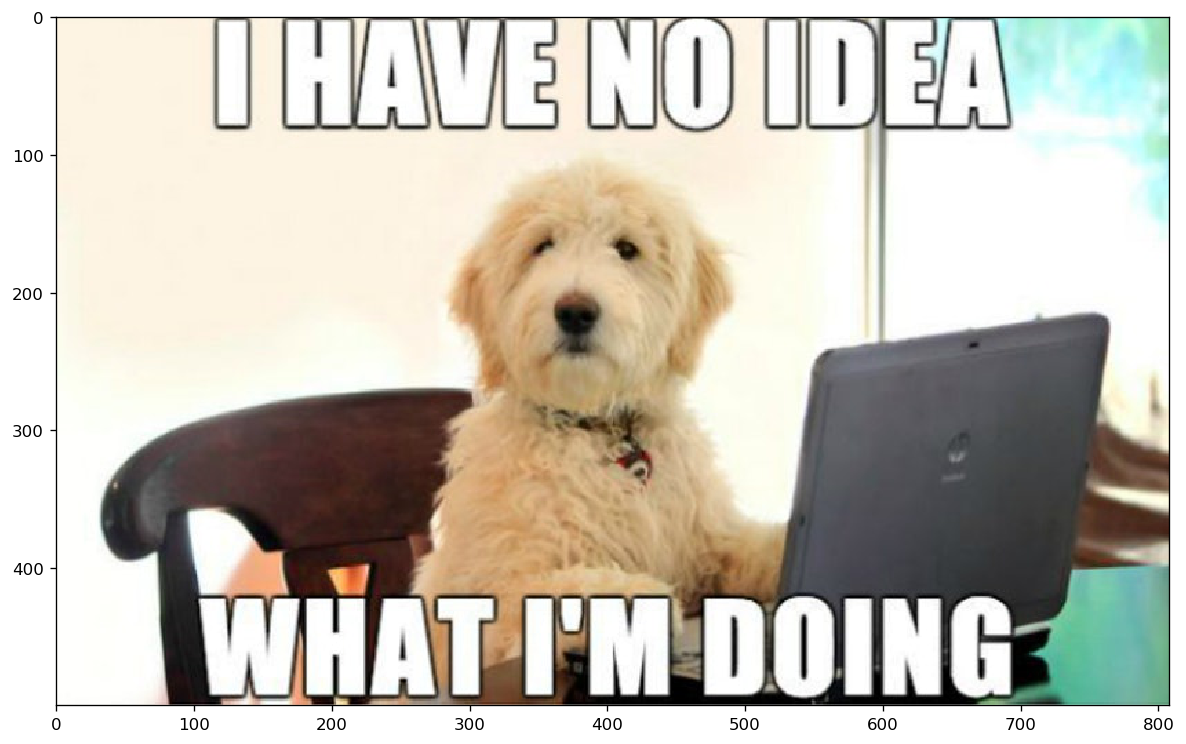

In [14]:
"""
Um plot sempre possui uma figure que pode ser criada explicitamente ou implicitamente
"""
fig = plt.figure( figsize=(10,6), dpi=120 )
ax = fig.subplots()
plt.tight_layout()
plt.show()

import time
time.sleep(4)
from IPython.display import clear_output


fig = plt.figure( figsize=(10,10), dpi=120 )
ax = fig.subplots()
plt.imshow(mpimg.imread('imagens/figura.jpg'))
plt.tight_layout()
clear_output()
plt.show()

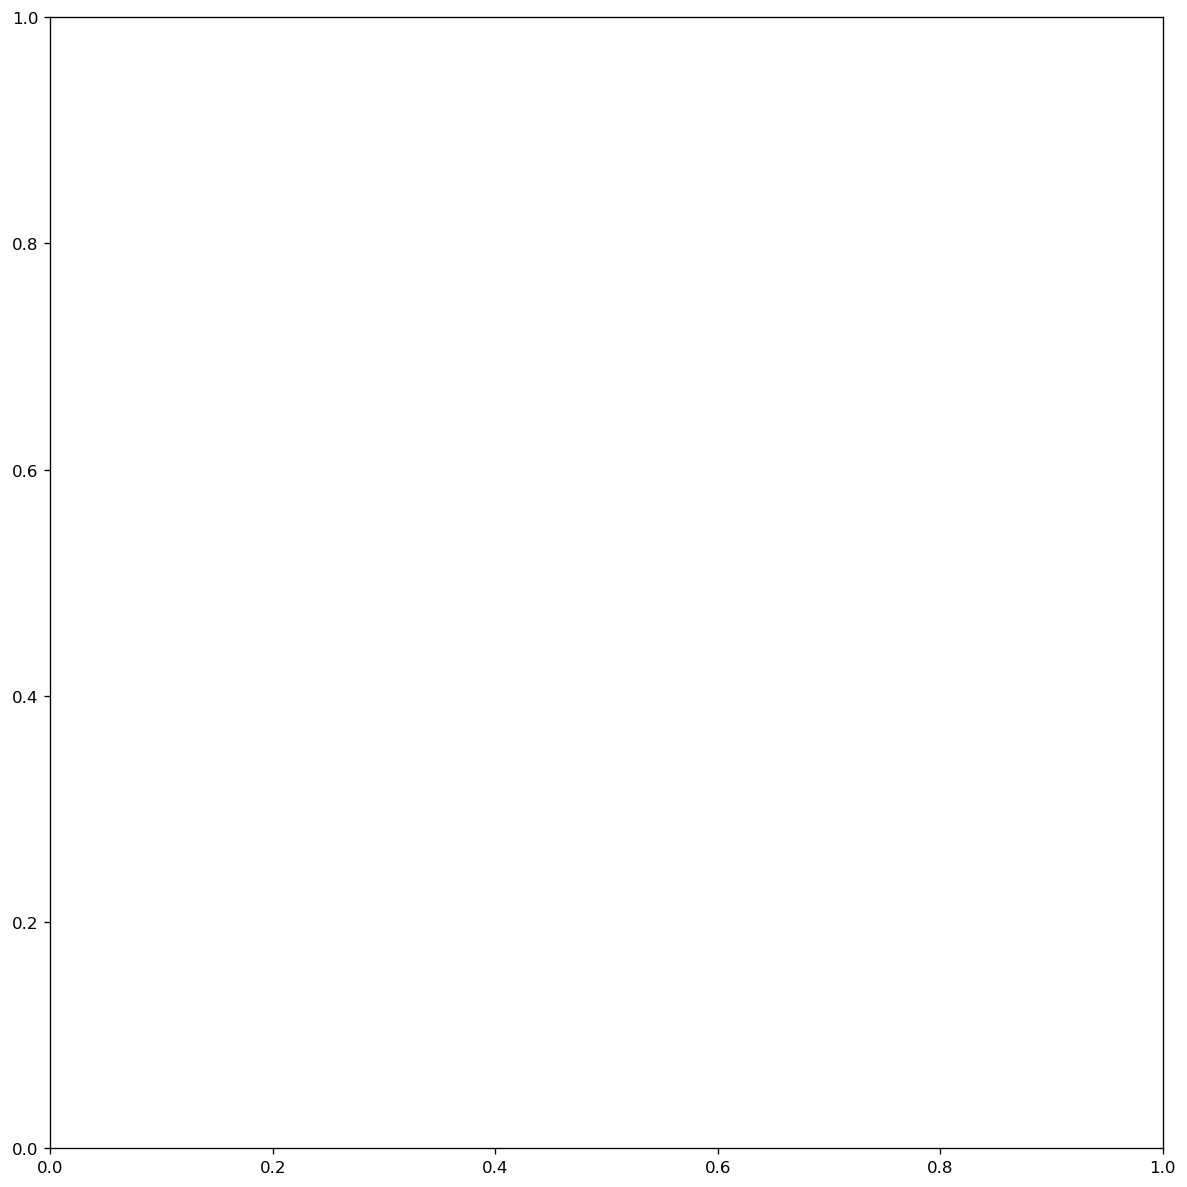

In [15]:
"""
Um plot sempre possui uma figure que pode ser criada explicitamente ou implicitamente
"""
fig = plt.figure( figsize=(10,10), dpi=120 )
ax = fig.subplots()
#plt.imshow(mpimg.imread('imagens/figura.jpg'))
plt.tight_layout()
plt.show()



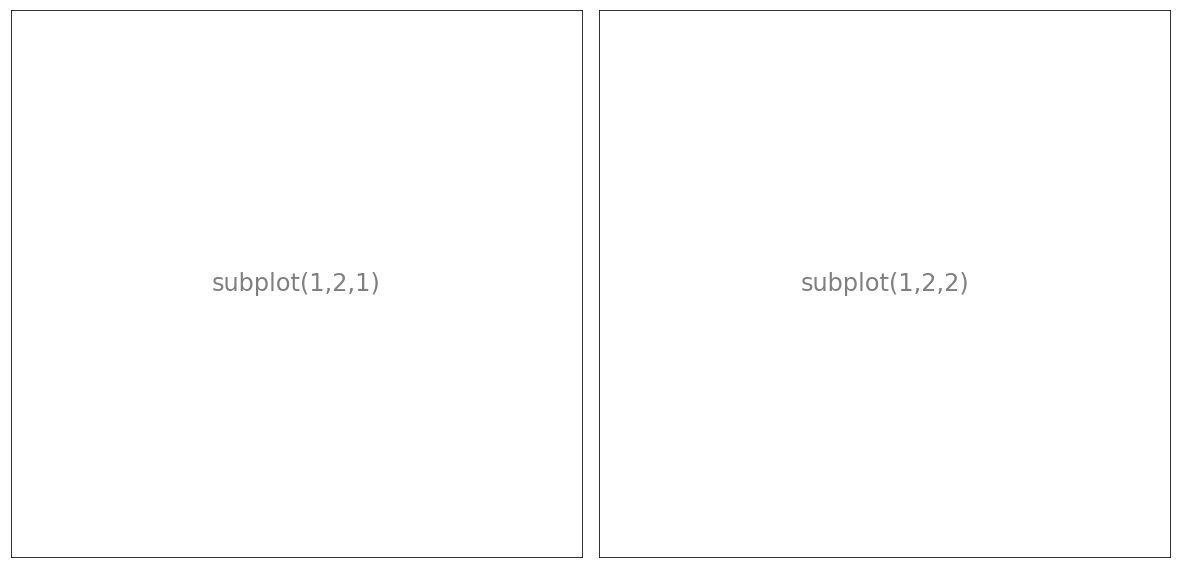

---

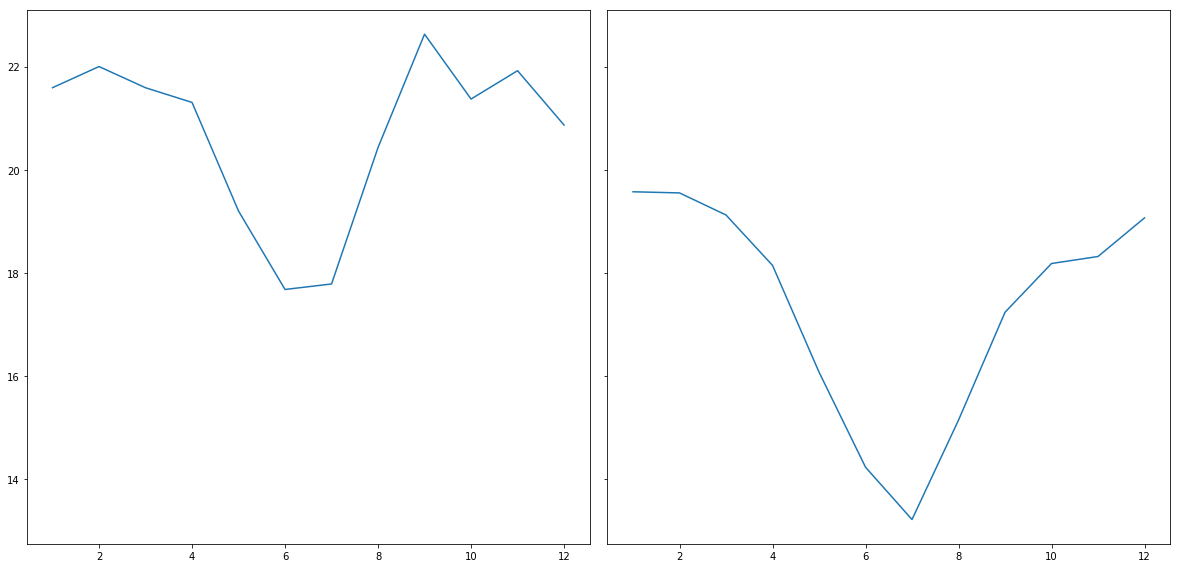

In [18]:
from IPython.core.display import display, HTML, Markdown

fig = plt.figure(figsize=(16.5,8))
plt.subplot(1,2,1)
plt.xticks([]), plt.yticks([])
plt.text(0.5,0.5, 'subplot(1,2,1)',ha='center',va='center',size=24,alpha=.5)

plt.subplot(1,2,2)
plt.xticks([]), plt.yticks([])
plt.text(0.5,0.5, 'subplot(1,2,2)',ha='center',va='center',size=24,alpha=.5)
plt.tight_layout()
plt.show()

display(Markdown('---'))

plt.rcParams['figure.figsize'] = (16.5,8)
f, (ax1, ax2) = plt.subplots(1,2, sharey=True, sharex=True)

ax1.plot(df_temp_media_mes['Mês'], df_temp_media_mes['TBS {C}'])
ax2.plot(df_temp_media_mes['Mês'], df_temp_media_mes['TBU {C}'])
plt.tight_layout()
plt.show()

## Anatomia de uma figura

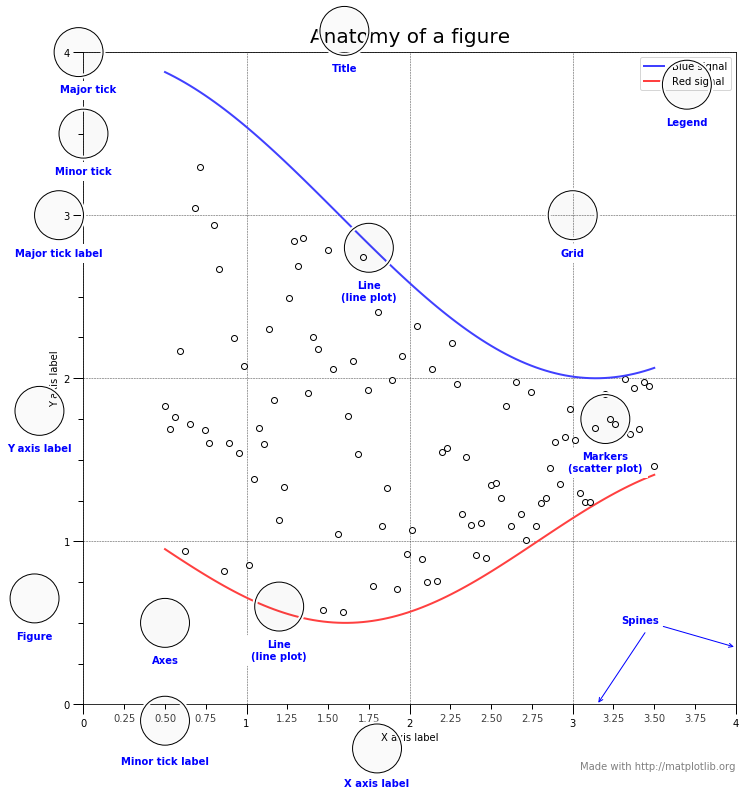

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x


ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xycoords='data',
            xytext=(3.3, 0.5), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xycoords='data',
            xytext=(3.45, 0.45), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()

# Código retirado de 
# https://matplotlib.org/examples/showcase/anatomy.html

## Tutoriais e Referências

1. Matplotlib tutorial, Nicolas P. Rougier<br/>
https://www.labri.fr/perso/nrougier/teaching/matplotlib/
2. Top 50 matplotlib Visualizations – The Master Plots (with full python code)<br/>
https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/#10.-Diverging-Bars